## 4-1 我的第一個神經網路

修改一下上課的範例, 訓練你第一號神經網路, 做手寫辨識。    
比如更換不同層數、每層不同神經元數、用不同的 activation function 等等。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
from keras.utils import np_utils

In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

In [4]:
print("訓練資料筆數:", len(x0_train))
print("測試資料筆數:", len(x0_test))

訓練資料筆數: 60000
測試資料筆數: 10000


In [5]:
from ipywidgets import interact

In [8]:
def show(ind):
    print("數字: ", y0_train[ind])
    #fig, ax = plt.subplots()
    #ax.set_axis_off()
    plt.imshow(x0_train[ind], cmap='Greys')

數字:  9


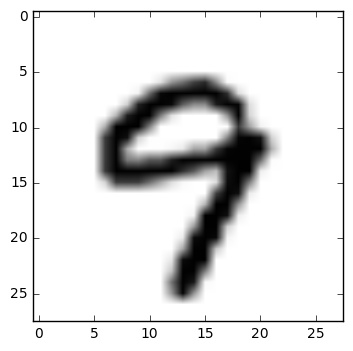

In [9]:
interact(show, ind=(0, 59999))

In [12]:
x_train = x0_train.reshape(60000, 28*28)
x_test = x0_test.reshape(10000,28*28)   
#將矩陣拉平為向量

In [13]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)   
#將輸出資料格式改變為向量

我的第一個神經網路來了！

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation #Dense表示Fully connected
from keras.optimizers import SGD #?

In [15]:
model = Sequential() #空的神經網路建模

In [16]:
model.add(Dense(units=520, input_dim=28*28))
model.add(Activation('sigmoid')) #第一層

In [17]:
model.add(Dense(units=520, input_dim=784))
model.add(Activation('sigmoid')) #第二層

In [18]:
model.add(Dense(units=520, input_dim=784))
model.add(Activation('hard_sigmoid')) #第三層

In [19]:
model.add(Dense(units=10))
model.add(Activation('softmax')) #輸出層

In [20]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, batch_size=100, epochs=13)  #batch_size?

Epoch 1/13
60000/60000 [==============================] - 30s - loss: 0.0900 - acc: 0.1285    
Epoch 2/13
60000/60000 [==============================] - 28s - loss: 0.0890 - acc: 0.1631    
Epoch 3/13
60000/60000 [==============================] - 28s - loss: 0.0883 - acc: 0.1939    
Epoch 4/13
60000/60000 [==============================] - 30s - loss: 0.0873 - acc: 0.2396    
Epoch 5/13
60000/60000 [==============================] - 34s - loss: 0.0858 - acc: 0.2767    
Epoch 6/13
60000/60000 [==============================] - 31s - loss: 0.0834 - acc: 0.3069    
Epoch 7/13
60000/60000 [==============================] - 27s - loss: 0.0800 - acc: 0.3533    
Epoch 8/13
60000/60000 [==============================] - 28s - loss: 0.0765 - acc: 0.4071    
Epoch 9/13
60000/60000 [==============================] - 28s - loss: 0.0730 - acc: 0.4553    
Epoch 10/13
60000/60000 [==============================] - 29s - loss: 0.0687 - acc: 0.5096    
Epoch 11/13
60000/60000 [========================

In [22]:
from ipywidgets import interact_manual

In [23]:
result = model.predict_classes(x_test)

 9920/10000 [============================>.] - ETA: 0s

In [24]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為: ", result[測試編號])

神經網路判斷為:  4


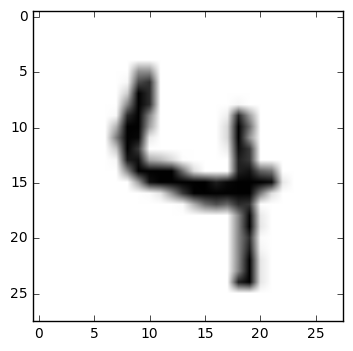

In [25]:
interact_manual(辨識, 測試編號=(0, 9999))

In [26]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')